In [2]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

If you are dealing with housing data:
- Start by creating a scatter_mapbox for location data (lat, lon)
- Use `value_counts()` to determine most prevalent locations
- Summary statistic --> check for skewdness # `describe()`
- Create Histograms and Boxplots for size and price columns --> identify outliers
- Group your data by states/counties and calculate mean price for each region --> `groupby()`
- Use your grouped dat to create a bar chart --> compare prices for each region
- Use price per m2 instead of whole price
- Use scatter plots and correlations to compare relationships btwn price and size, location, etc...

EDA: Exploratory Data Analysis

- Descriptive statistics
- Data visualization

In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv("./data/mexico-housing.csv")

print(df.shape)
print()
print(df.info())
print()
df.head()

(1736, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB
None



,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


LOCATION DATA: `lat` and `lon` columns --> scatter_mapbox

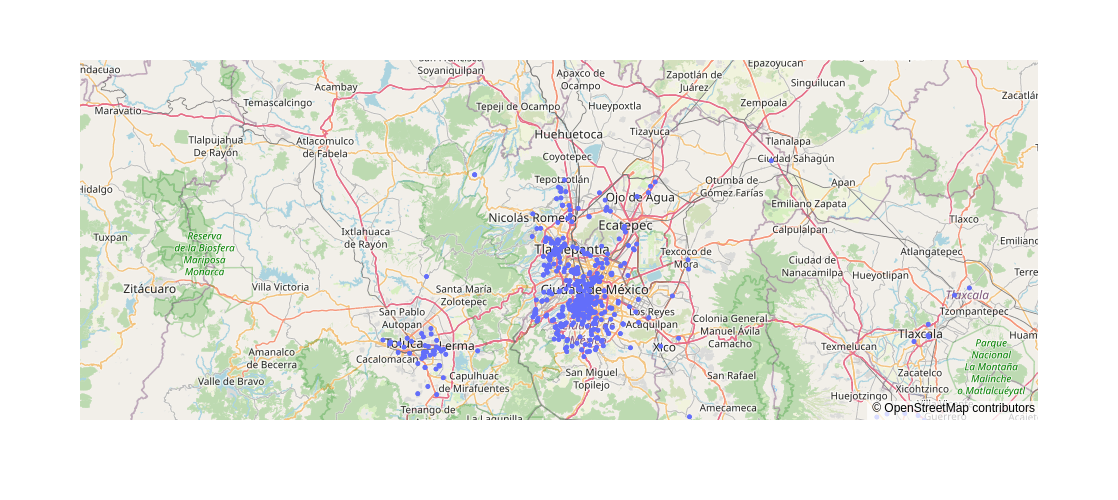

In [5]:
# Building a scatter plot on top of a map
fig = px.scatter_mapbox(
    df,
    lat=df["lat"],
    lon=df["lon"],
    center={"lat":19.56, "lon":-99.23},
    width=500,
    height=500,
    hover_data=["price_usd"],
    mapbox_style="open-street-map",
)

fig.show()

CATEGORICAL DATA: `state` --> most prevalent states

In [6]:
df["state"].value_counts()[:10]

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: count, dtype: int64

NUMERICAL DATA: `area_m2` and `price_usd` --> Descriptive stats

In [7]:
df_sub = df[["area_m2", "price_usd"]]
print(df_sub.mode())
df_sub.describe()

   area_m2  price_usd
0      200   68492.42


,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980800
std,80.594539,65426.173793
min,60.000000,33157.894737
25%,101.750000,65789.473684
50%,156.000000,99262.132105
75%,220.000000,150846.665000
max,385.000000,326733.660000


HISTOGRAMS AND BOXPLOTS

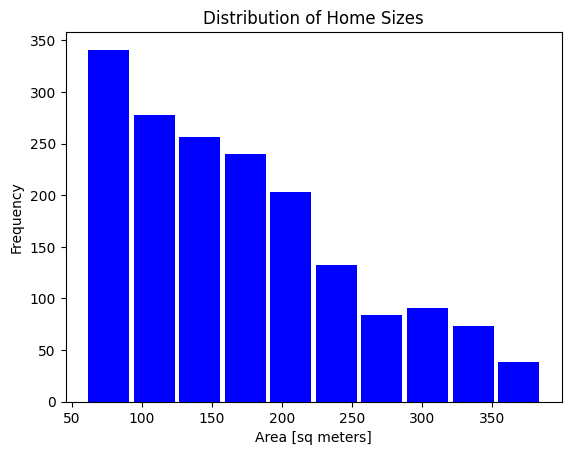

In [8]:
plt.hist(df_sub["area_m2"], bins=10, rwidth=0.9, color="b")
plt.title("Distribution of Home Sizes")
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency");

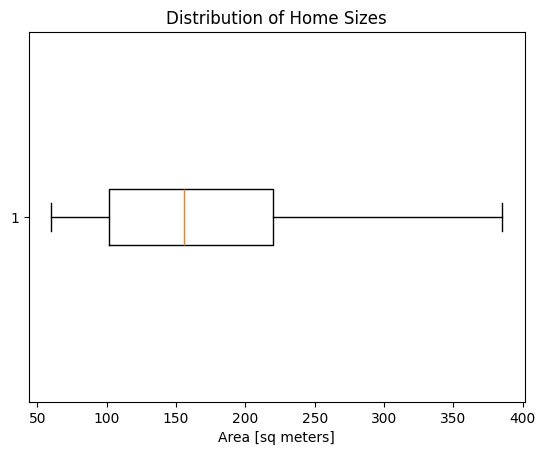

In [9]:
plt.boxplot(df_sub["area_m2"], vert=False)
plt.title("Distribution of Home Sizes")
plt.xlabel("Area [sq meters]");

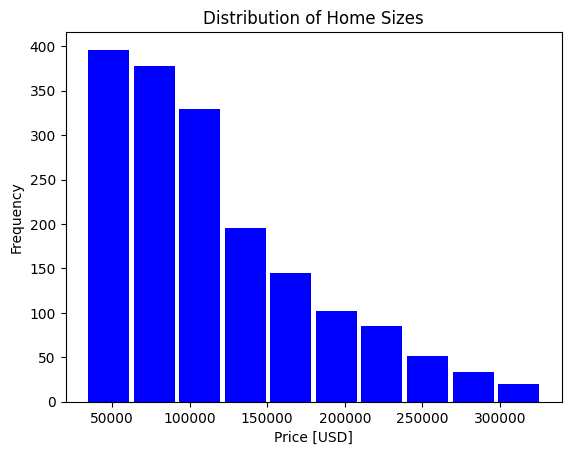

In [10]:
plt.hist(df_sub["price_usd"], bins=10, rwidth=0.9, color="b")
plt.title("Distribution of Home Sizes")
plt.xlabel("Price [USD]")
plt.ylabel("Frequency");

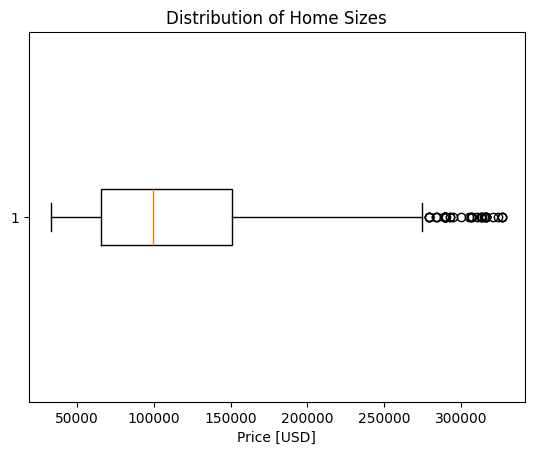

In [11]:
plt.boxplot(df_sub["price_usd"], vert=False)
plt.title("Distribution of Home Sizes")
plt.xlabel("Price [USD]");

INFLUENCES OF HOUSE PRICE: LOCATION, SIZE

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


1. LOCATION AND PRICE

In [15]:
state_mean_price = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
state_mean_price.head()

state
Querétaro           133955.913417
Guanajuato          133277.965833
Nuevo León          129221.985834
Distrito Federal    128347.267365
Quintana Roo        128065.415734
Name: price_usd, dtype: float64

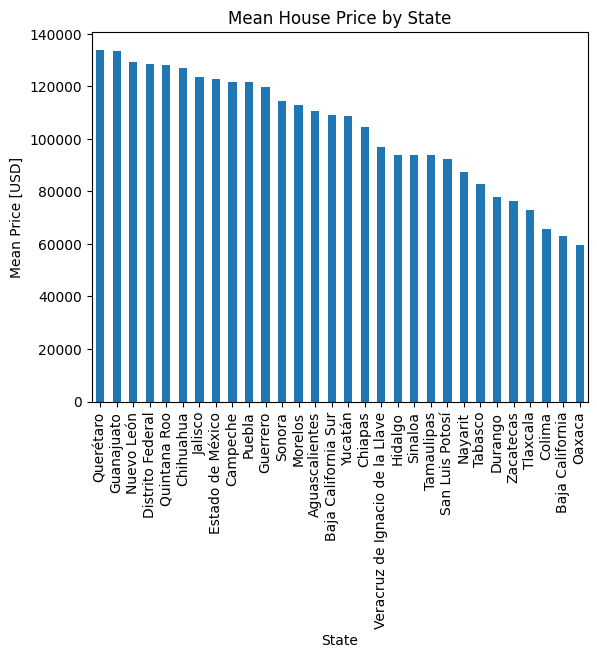

In [17]:
state_mean_price.plot(
    kind="bar",
    title="Mean House Price by State",
    xlabel="State",
    ylabel="Mean Price [USD]",
    legend=None,
);

In [18]:
df["price_m2"] = df["price_usd"] / df["area_m2"]
df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


In [19]:
state_mean_price_m2 = df.groupby("state")["price_m2"].mean().sort_values(ascending=False)
state_mean_price_m2.head()

state
Distrito Federal    1175.889150
Estado de México     763.753423
Guerrero             761.557207
Jalisco              743.568106
Quintana Roo         736.455283
Name: price_m2, dtype: float64

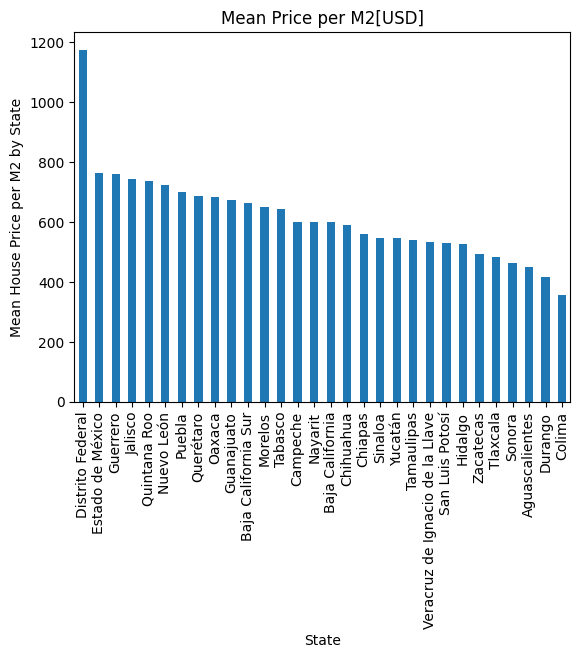

In [20]:
state_mean_price_m2.plot(
    kind="bar",
    title="Mean Price per M2[USD]",
    xlabel="State",
    ylabel="Mean House Price per M2 by State"
);

CONCLUSION

- Locations/states with great/high economies/GDP have most expensive houses
- Capital cities or cities in general tend to have more expensive houses 
compared to towns

2. SIZE AND PRICE
- Does a big house indicate a big price??

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
 6   price_m2       1736 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 95.1+ KB


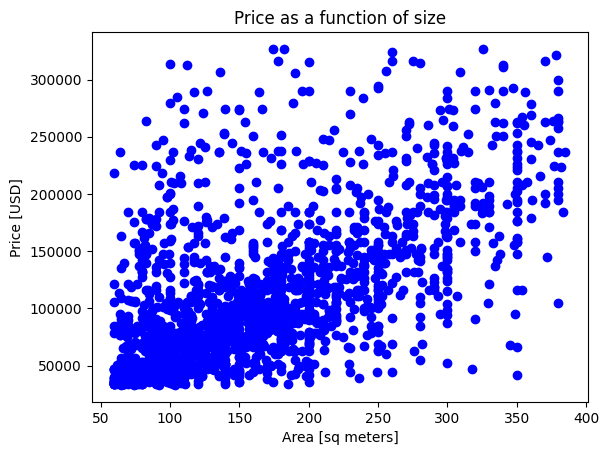

In [24]:
# Scatter plot --> comparing 2 columns
plt.scatter(df["area_m2"], df["price_usd"], color="b")
plt.title("Price as a function of size")
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]");

In [26]:
df["area_m2"].corr(df["price_usd"], method="pearson")

0.5855182454266904

In [28]:
df["state"].unique()

array(['Estado de México', 'Nuevo León', 'Guerrero', 'Yucatán',
       'Querétaro', 'Morelos', 'Chiapas', 'Tabasco', 'Distrito Federal',
       'Nayarit', 'Puebla', 'Veracruz de Ignacio de la Llave', 'Sinaloa',
       'Tamaulipas', 'Jalisco', 'San Luis Potosí', 'Baja California',
       'Hidalgo', 'Quintana Roo', 'Sonora', 'Chihuahua',
       'Baja California Sur', 'Zacatecas', 'Aguascalientes', 'Guanajuato',
       'Durango', 'Tlaxcala', 'Colima', 'Oaxaca', 'Campeche'],
      dtype=object)

In [29]:
# Positive correlation seen... Does this apply to all locations
df_morelos = df[df["state"].apply(lambda x: True if x == "Morelos" else False)]
df_morelos.head()

,property_type,state,lat,lon,area_m2,price_usd,price_m2
6,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305,227351.46,745.414623


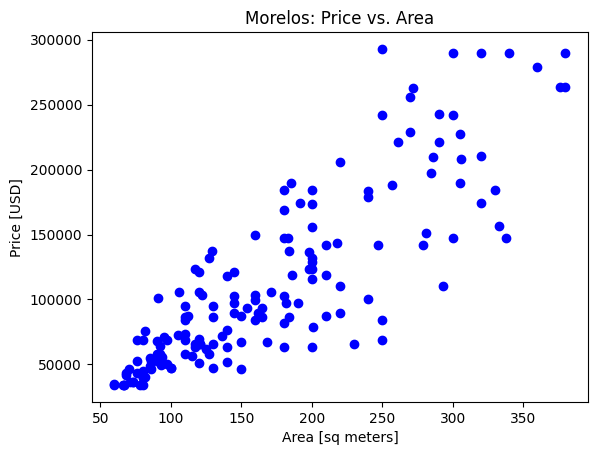

In [30]:
plt.scatter(df_morelos["area_m2"], df_morelos["price_usd"], color="b")
plt.title("Morelos: Price vs. Area")
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]");

In [35]:
df_morelos["area_m2"].corr(df_morelos["price_usd"], method="pearson")

0.849807761406148

In [37]:
df_mexicoC = df[(df["state"] == "Distrito Federal")]
df_mexicoC.head()

,property_type,state,lat,lon,area_m2,price_usd,price_m2
14,apartment,Distrito Federal,19.390748,-99.158695,127,131716.20,1037.135433
16,house,Distrito Federal,19.337652,-99.223327,297,264390.77,890.204613
20,apartment,Distrito Federal,19.403334,-99.157755,129,131716.20,1021.055814
21,apartment,Distrito Federal,19.428152,-99.106194,68,67175.26,987.871471
26,apartment,Distrito Federal,19.430141,-99.172536,97,104846.10,1080.887629


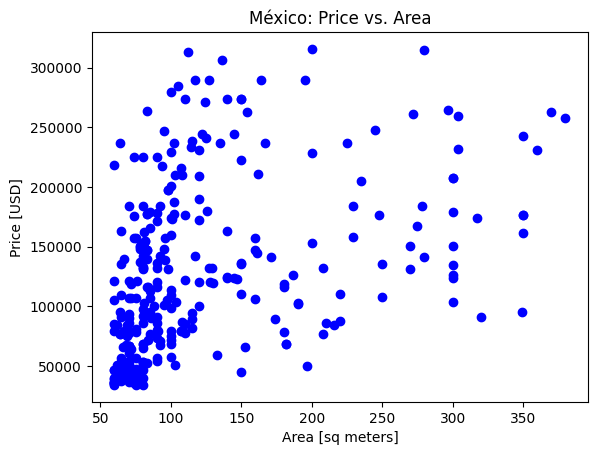

In [38]:
plt.scatter(df_mexicoC["area_m2"], df_mexicoC["price_usd"], color="b")
plt.title("México: Price vs. Area")
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]");

In [39]:
df_mexicoC["area_m2"].corr(df_mexicoC["price_usd"], method="pearson")

0.4107039205853435

CONCLUSION
- In some locations, other factors come into play
- Esp capital cities: small apartments can cost more that larger houses